In [1]:
import h5py 
import numpy as np 
import pandas as pd 
import xgboost
from xgboost import XGBRegressor 

import pandas as pd
import numpy as np
from scipy.stats import maxwell
from numpy.random import lognormal, normal

from matplotlib import pyplot as plt 
from sklearn.metrics import mean_squared_error as mse


import pandas as pd
import shap
import sklearn

from sklearn.model_selection import train_test_split

In [2]:
!ls Downloads/vigna-2021-v4-vqtl-all-utf-v2.h5

Downloads/vigna-2021-v4-vqtl-all-utf-v2.h5


In [3]:
with h5py.File("Downloads/vigna-2021-v4-vqtl-all-utf-v2.h5", "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    keys = list(f.keys())
    d = {k: list(f[k]) for k in keys}

Keys: <KeysViewHDF5 ['doy', 'geo_id', 'gr_covar', 'gr_names', 'month', 'response_EM', 'response_R1', 'response_R3', 'response_R5', 'response_R7', 'response_R8', 'species', 'year']>


In [4]:
for k in d:
    print(k, len(d[k]))
    
    
#d["species"]

doy 1596
geo_id 1596
gr_covar 1596
gr_names 15
month 1596
response_EM 1596
response_R1 1596
response_R3 1596
response_R5 1596
response_R7 1596
response_R8 1596
species 1596
year 1596


In [5]:
d['gr_names']

['NC_028351.1_10609109_T_C',
 'NC_028352.1_1756685_A_T',
 'NC_028353.1_4083774_A_T',
 'NC_028353.1_7715763_T_C',
 'NC_028354.1_19007443_T_C',
 'NC_028354.1_19193706_A_T',
 'NC_028356.1_5599756_C_A',
 'NC_028356.1_18228698_C_T',
 'NC_028357.1_36154036_G_T',
 'NC_028357.1_51548743_T_C',
 'NC_028358.1_42385899_G_T',
 'NC_028358.1_43289540_T_C',
 'NC_028358.1_43289553_G_A',
 'NC_028361.1_10688905_A_C',
 'NW_014541837.1_1074368_C_T']

In [6]:
!ls Downloads/markers_filtered-v3.csv

Downloads/markers_filtered-v3.csv


In [7]:
markers_v3 = pd.read_csv("Downloads/markers_filtered-v3.csv", index_col='Unnamed: 0')

In [8]:
markers_v4 = pd.read_csv("Downloads/markers_filtered-v4.csv", index_col='Unnamed: 0')

In [9]:
markers_v4.head(20)

,NC_028351.1_1130369_G_T,NC_028351.1_2589691_G_A,NC_028351.1_4389407_C_T,NC_028351.1_6653772_G_A,NC_028351.1_7158567_A_G,NC_028351.1_7158573_G_T,NC_028351.1_7923697_C_T,NC_028351.1_9481105_C_T,NC_028351.1_10101288_G_A,NC_028351.1_10609109_T_C,...,NW_014543107.1_409456_A_G,NW_014543118.1_25390_A_C,NW_014543248.1_376807_A_G,NW_014543262.1_740995_G_A,NW_014543262.1_1621171_G_T,NW_014543262.1_1622812_T_C,NW_014543415.1_249763_A_G,NW_014543415.1_372624_C_T,NW_014543432.1_144127_G_A,NW_014543808.1_360373_G_C
041W,2,2,2,2,2,2,2,1,0,2,...,2,2,2,2,2,0,2,0,2,2
072.W,2,2,2,2,2,2,2,1,0,2,...,2,2,2,2,2,0,2,0,2,2
1,0,0,0,0,0,2,1,1,2,2,...,2,2,2,2,2,2,2,2,2,2
1.B,1,0,0,2,0,2,0,1,2,0,...,2,2,0,0,0,0,2,2,0,2
1.Var.sublobata..1A.,2,2,2,0,0,2,2,1,0,2,...,2,2,2,2,2,0,2,0,2,2
10,0,0,0,2,2,0,2,1,2,1,...,2,2,1,1,2,2,2,2,1,2
100,1,1,0,1,0,2,1,1,2,1,...,0,0,2,2,2,2,0,0,0,2
100.A,1,0,0,2,0,2,2,1,2,0,...,2,2,2,2,2,2,2,2,0,2
101,1,1,0,2,1,1,0,1,0,2,...,1,1,2,0,2,2,2,2,0,2
101.A,1,0,0,0,0,2,0,1,2,2,...,2,2,2,0,2,2,2,2,0,2


In [10]:
!ls Downloads/minicore_characterization.csv

Downloads/minicore_characterization.csv


In [11]:
minicore = pd.read_csv("Downloads/minicore_characterization.csv")
minicore.head()

,No.,VI no.,Origin,characterization year,Unnamed: 4,Unnamed: 5
0,1,VI000020 \tAY,Thailand,1984,NaN,1984: sown on 28/08/1984; harvest on 24/10/1984
1,2,VI000099 \tAG,India,1984,NaN,1985: sown on 17/09/1985; harvest on 03/10/1985
2,3,VI000105 \tBG,India,1984,NaN,NaN
3,4,VI000164\t BG,Afghanistan,1984,NaN,NaN
4,5,VI000170 \tB-BR,Afghanistan,1984,NaN,NaN


Срочно требуется осмысленный результат по этой теме, поэтому попробуйте применить имеющийся подход и выделить важные снипы для вигны. 

Данные в файлах: фенотип — vigna-2021-v4-vqtl-all-utf-v2.h5 
    секция response_R1 — время цветения, 
    генотип — markers_filtered, 
            есть два варианта, начать можно с в3, там меньше снипов, в в4 больше. 

Соответствие идет через minicore_characterization.csv, в котором столбик «No.» соответствует rownames в markers_filtered, а «VI no.» соотвествует секции spieces в vigna-2021-v4-vqtl-all-utf-v2.h5. Файлы типа h5 читаются в Питоне и R пакетами для hdf5, для командной строки тоже есть программа. В секции "gr_names" в vigna-2021-v4-vqtl-all-utf-v2.h5 названия снипов, которые получались другим методом, по-идее некоторые из них должны присутствовать и сейчас.

In [12]:
minicore["bVI no."] = [bytes(m.replace('\t', ''), 'utf-8') for m in minicore["VI no."]]
idx_minicore = minicore.set_index("bVI no.")
idx_minicore.head(20)

,No.,VI no.,Origin,characterization year,Unnamed: 4,Unnamed: 5
bVI no.,,,,,,
b'VI000020 AY',1,VI000020 \tAY,Thailand,1984,NaN,1984: sown on 28/08/1984; harvest on 24/10/1984
b'VI000099 AG',2,VI000099 \tAG,India,1984,NaN,1985: sown on 17/09/1985; harvest on 03/10/1985
b'VI000105 BG',3,VI000105 \tBG,India,1984,NaN,NaN
b'VI000164 BG',4,VI000164\t BG,Afghanistan,1984,NaN,NaN
b'VI000170 B-BR',5,VI000170 \tB-BR,Afghanistan,1984,NaN,NaN
b'VI000175 BY',6,VI000175\t BY,India,1984,NaN,NaN
b'VI000188 A-BLM',7,VI000188 \tA-BLM,Pakistan,1984,NaN,NaN
b'VI000203 B-BR',8,VI000203\t B-BR,Afghanistan,1984,NaN,NaN
b'VI000212 A-BLM',9,VI000212\t A-BLM,United States of America,1984,NaN,NaN


In [13]:
no = []

for s in d['species']:
    if s in idx_minicore.index:
        no.append(str(idx_minicore['No.'][s]))
    else:
        no.append(None)
        
        


no = np.array(no)
response = np.array([m[0] for m in d["response_R1"]])

data = pd.DataFrame(np.array([no[no != None], response[no != None]]).T
                    , columns = ['No.', 'response_R1'])


data

,No.,response_R1
0,214,47
1,134,62
2,263,31
3,143,183
4,55,44
...,...,...
1296,11,60
1297,196,57
1298,210,216
1299,140,44


In [14]:
X = markers_v4.loc[data["No."]]
y = data.response_R1

In [15]:
X.index = np.arange(0, 1301)
#X.reindex(index= np.arange(0, 1301))
X

,NC_028351.1_1130369_G_T,NC_028351.1_2589691_G_A,NC_028351.1_4389407_C_T,NC_028351.1_6653772_G_A,NC_028351.1_7158567_A_G,NC_028351.1_7158573_G_T,NC_028351.1_7923697_C_T,NC_028351.1_9481105_C_T,NC_028351.1_10101288_G_A,NC_028351.1_10609109_T_C,...,NW_014543107.1_409456_A_G,NW_014543118.1_25390_A_C,NW_014543248.1_376807_A_G,NW_014543262.1_740995_G_A,NW_014543262.1_1621171_G_T,NW_014543262.1_1622812_T_C,NW_014543415.1_249763_A_G,NW_014543415.1_372624_C_T,NW_014543432.1_144127_G_A,NW_014543808.1_360373_G_C
0,1,0,1,2,2,0,1,1,0,2,...,0,0,1,2,2,2,1,1,1,2
1,0,0,0,0,0,2,1,1,2,2,...,2,2,2,2,2,2,2,2,2,2
2,0,0,0,2,0,2,2,1,2,0,...,2,2,0,0,0,0,2,2,0,0
3,2,0,2,2,0,2,0,1,0,2,...,0,0,0,2,2,2,1,1,0,2
4,0,0,0,0,0,2,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,1,0,0,2,1,2,2,1,2,1,...,2,2,1,0,0,0,2,2,0,1
1297,2,2,1,2,2,1,1,1,0,2,...,0,0,0,2,2,2,1,1,2,2
1298,0,0,0,2,0,2,0,1,2,0,...,1,1,0,0,0,0,2,2,2,2
1299,0,0,0,1,1,1,1,1,1,2,...,1,1,2,2,2,2,1,1,0,2


In [16]:
xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=1, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [17]:
R = []
params = []

In [19]:
a = np.array([1, 2, 3, 7, 2])
b = np.array([-2, 3, 4, 5, 1])

np.median(np.abs(a - b))

1.0

In [20]:
np.abs(a- b)

array([3, 1, 1, 2, 1])

In [ ]:
#max_depth=20, min_child_weight=1 #n_estimators=200
#learning_rate=0.01

X_dr = X.drop(['NC_028358.1_31436226_G_A'
               , 'NW_014543262.1_1622812_T_C'
               , 'NC_028358.1_31415131_C_T'
               , 'NC_028358.1_31321418_G_C'
               , 'NC_028354.1_20359715_C_T'
               , 'NC_028353.1_4083774_A_T'
               , 'NC_028357.1_49311427_C_T'
               , 'NC_028356.1_18228698_C_T'
               , 'NC_028358.1_22076567_G_A'], axis=1)

from sklearn import model_selection

def optimize(params, param_names, x, y):
    params = dict(zip(param_names, params))
    model = XGBRegressor(**params)
    kf = model_selection.KFold(n_splits=5)
    median = []
    for idx in kf.split(x, y):
        train_idx, test_idx = idx[0], idx[1]
        train_x, test_x = x.loc[train_idx], x.loc[test_idx]
        train_y, test_y = y[train_idx], y[test_idx]
        
        train_x.head()
        
        model.fit(train_x, train_y)
        pred = model.predict(test_x)
        #fold_corr = np.corrcoef(pred, test_y.astype('float'))[0][1]
        #corr.append(fold_corr)
        median.append(np.median(np.abs(pred - test_y.astype('float'))))
    
    return np.mean(median) 
        

from functools import partial 
from skopt import space
param_space = [
    space.Integer(3, 15, name = "max_depth"), 
    space.Integer(1, 10, name = "min_child_weight"), 
    space.Integer(40, 200, name = "n_estimators"), 
    space.Real(0.0005, 0.8, prior="uniform", name = "learning_rate"),
    space.Real(0.0, 10, prior="uniform", name = "min_split_loss"),
    space.Real(0.0, 10, prior="uniform", name = "lambda"),
    space.Real(0.0, 10, prior="uniform", name = "alpha")
    
]
param_names = [
    "max_depth", 
    "min_child_weight", 
    "n_estimators", 
    "learning_rate",
    "min_split_loss",
    "lambda",
    "alpha"
]

optimization_function = partial (
    optimize, 
    param_names=param_names, 
    x = X_dr, 
    y = y
)


from skopt import gp_minimize
result_1 = gp_minimize(
    optimization_function, 
    dimensions=param_space,
    n_calls=200,
    n_random_starts=20,
    verbose=10,   
)


xgb_1 = XGBRegressor(**dict(zip(param_names, result_1.x)))
xgb_1.fit(X_dr, y)


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.9952
Function value obtained: 34.8214
Current minimum: 34.8214
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 4.8800
Function value obtained: 34.7068
Current minimum: 34.7068
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 4.6019
Function value obtained: 34.7408
Current minimum: 34.7068
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 8.7581
Function value obtained: 35.0627
Current minimum: 34.7068
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 6.8997
Function value obtained: 34.9651
Current minimum: 34.7068
Iteration No: 6 started. 

Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 5.6234
Function value obtained: 9.3193
Current minimum: 9.3193
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 4.6254
Function value obtained: 8.7986
Current minimum: 8.7986
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 7.5299
Function value obtained: 8.9693
Current minimum: 8.7986
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 8.8228
Function value obtained: 10.5531
Current minimum: 8.7986
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 3.3941
Function value obtained: 46.2473
Current minimum: 8.7986
Iteration No: 47 started. S

Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 6.0797
Function value obtained: 6.1348
Current minimum: 5.8883
Iteration No: 83 started. Searching for the next optimal point.
Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 5.9869
Function value obtained: 5.9081
Current minimum: 5.8883
Iteration No: 84 started. Searching for the next optimal point.
Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 5.8774
Function value obtained: 5.9667
Current minimum: 5.8883
Iteration No: 85 started. Searching for the next optimal point.
Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 6.7200
Function value obtained: 6.5680
Current minimum: 5.8883
Iteration No: 86 started. Searching for the next optimal point.
Iteration No: 86 ended. Search finished for the next optimal point.
Time taken: 4.6506
Function value obtained: 34.1928
Current minimum: 5.8883
Iteration No: 87 started. Se

Iteration No: 122 ended. Search finished for the next optimal point.
Time taken: 5.7903
Function value obtained: 6.2635
Current minimum: 5.8883
Iteration No: 123 started. Searching for the next optimal point.
Iteration No: 123 ended. Search finished for the next optimal point.
Time taken: 5.9085
Function value obtained: 33.4379
Current minimum: 5.8883
Iteration No: 124 started. Searching for the next optimal point.
Iteration No: 124 ended. Search finished for the next optimal point.
Time taken: 6.3483
Function value obtained: 6.0108
Current minimum: 5.8883
Iteration No: 125 started. Searching for the next optimal point.
Iteration No: 125 ended. Search finished for the next optimal point.
Time taken: 11.9138
Function value obtained: 34.9558
Current minimum: 5.8883
Iteration No: 126 started. Searching for the next optimal point.
Iteration No: 126 ended. Search finished for the next optimal point.
Time taken: 5.6993
Function value obtained: 13.1429
Current minimum: 5.8883
Iteration No: 12

In [27]:
predict = xgb_1.predict(X_dr)
np.corrcoef(predict, y.astype('float'))[0][1]

0.12996270826499343

In [28]:
#result_1.x [3, 9, 50, 0.019238713733631226]
#result_1.x [3, 2, 90, 0.011017513495655804, 4.56924246551032, 10.0, 7.43403947549952]

[3, 2, 90, 0.011017513495655804, 4.56924246551032, 10.0, 7.43403947549952]

In [63]:
predict = xgb_1.predict(X_dr)
R.append(np.corrcoef(predict, y.astype('float'))[0][1])
params.append(result_1.x)
scores = xgb_1.get_booster().get_score(importance_type='gain')
#plt.stem([scores[c] for c in X.columns if c in scores], markerfmt=' ')
max([(scores[k], k) for k in scores], key = lambda x: x[0])[1]

'NC_028358.1_22076567_G_A'

In [65]:
R, params

([0.14780087788971064,
  0.294527030069721,
  0.1295947743583424,
  0.2945211404028766,
  0.29452703385685725,
  0.2945242480821116,
  0.294527033871816,
  0.11799967896738195,
  0.2945270186091359],
 [[3, 9, 139, 0.0005],
  [6, 6, 65, 0.6308073950176448],
  [3, 1, 200, 0.0005],
  [3, 4, 111, 0.7918437814797478],
  [15, 4, 198, 0.6576575255809347],
  [3, 3, 144, 0.7560347711115655],
  [6, 5, 50, 0.8],
  [3, 10, 50, 0.0005],
  [3, 1, 200, 0.8]])

In [20]:
result_1.x

[10, 10, 180, 0.722134528921191]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.722134528921191,
             max_delta_step=0, max_depth=10, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=180, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [101]:
from functools import partial 

from skopt import gp_minimize
from skopt import space

from sklearn import model_selection
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

def optimize_mse(params, param_names, x, y):
    params = dict(zip(param_names, params))
    model = XGBRegressor(**params)
    kf = model_selection.KFold(n_splits=5)
    mse_list = []
    for idx in kf.split(x, y):
        train_idx, test_idx = idx[0], idx[1]
        train_x, test_x = x.loc[train_idx], x.loc[test_idx]
        train_y, test_y = y[train_idx], y[test_idx]
        
        train_x.head()
        
        model.fit(train_x, train_y)
        pred = model.predict(test_x)
        fold_mse = mape(pred, test_y.astype('float'))
        mse_list.append(fold_mse)
        
    return np.mean(mse_list) 

cols_drop = []
OP = []

for i in range(8):
    param_space = [
        space.Integer(3, 15, name = "max_depth"), 
        space.Integer(1, 10, name = "min_child_weight"), 
        space.Integer(50, 200, name = "n_estimators"), 
        space.Real(0.0005, 0.8, prior="uniform", name = "learning_rate")
    ]
    param_names = [
        "max_depth", 
        "min_child_weight", 
        "n_estimators", 
        "learning_rate"
    ]

    optimization_function_mse = partial (
        optimize_mse, 
        param_names=param_names, 
        x = X.drop(cols_drop, axis=1), 
        y = y
    )

    result2 = gp_minimize(
        optimization_function_mse, 
        dimensions=param_space,
        n_calls=30,
        n_random_starts=10,
        verbose=10, 
    )
    
    opt_params = result2.x
    OP.append(opt_params)
    params = dict(zip(param_names, opt_params))
    model = XGBRegressor(**params)
    model.fit(X.drop(cols_drop, axis=1), y)
    scores = model.get_booster().get_score(importance_type='gain')
    max_snp = max([(scores[k], k) for k in scores], key = lambda x: x[0])[1]
    cols_drop.append(max_snp)
    
    
    

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 7.6904
Function value obtained: 0.7399
Current minimum: 0.7399
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 4.7110
Function value obtained: 0.7397
Current minimum: 0.7397
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 13.1876
Function value obtained: 0.7392
Current minimum: 0.7392
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 4.9852
Function value obtained: 0.7396
Current minimum: 0.7392
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 2.5815
Function value obtained: 0.7428
Current minimum: 0.7392
Iteration No: 6 started. Evaluatin

Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 5.3693
Function value obtained: 11.3299
Current minimum: 0.6759
Iteration No: 13 started. Searching for the next optimal point.
Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 4.9700
Function value obtained: 0.7386
Current minimum: 0.6759
Iteration No: 14 started. Searching for the next optimal point.
Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 6.4119
Function value obtained: 9.1713
Current minimum: 0.6759
Iteration No: 15 started. Searching for the next optimal point.
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 6.2923
Function value obtained: 0.7387
Current minimum: 0.6759
Iteration No: 16 started. Searching for the next optimal point.
Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 4.7511
Function value obtained: 0.7401
Current minimum: 0.6759
Iteration No: 17 started. Se

Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 4.2820
Function value obtained: 0.7391
Current minimum: 0.7343
Iteration No: 24 started. Searching for the next optimal point.
Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 4.2772
Function value obtained: 0.7390
Current minimum: 0.7343
Iteration No: 25 started. Searching for the next optimal point.
Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 4.2412
Function value obtained: 0.7390
Current minimum: 0.7343
Iteration No: 26 started. Searching for the next optimal point.
Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 4.6944
Function value obtained: 0.7396
Current minimum: 0.7343
Iteration No: 27 started. Searching for the next optimal point.
Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 4.3098
Function value obtained: 0.7389
Current minimum: 0.7343
Iteration No: 28 started. Sea

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 6.8002
Function value obtained: 0.7381
Current minimum: 0.7374
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 4.0529
Function value obtained: 0.7379
Current minimum: 0.7374
Iteration No: 6 started. Evaluating function at random point.
Iteration No: 6 ended. Evaluation done at random point.
Time taken: 6.8868
Function value obtained: 0.7377
Current minimum: 0.7374
Iteration No: 7 started. Evaluating function at random point.
Iteration No: 7 ended. Evaluation done at random point.
Time taken: 4.2767
Function value obtained: 0.7372
Current minimum: 0.7372
Iteration No: 8 started. Evaluating function at random point.
Iteration No: 8 ended. Evaluation done at random point.
Time taken: 3.1070
Function value obtained: 0.7386
Current minimum: 0.7372
Iteration No: 9 started. Evaluating function at random point.
Iteration No: 9 ended. Evaluation d

Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 14.9392
Function value obtained: 0.7696
Current minimum: 0.6232
Iteration No: 16 started. Searching for the next optimal point.
Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 8.4501
Function value obtained: 0.7423
Current minimum: 0.6232
Iteration No: 17 started. Searching for the next optimal point.
Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 8.5488
Function value obtained: 0.7387
Current minimum: 0.6232
Iteration No: 18 started. Searching for the next optimal point.
Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 6.8593
Function value obtained: 0.7398
Current minimum: 0.6232
Iteration No: 19 started. Searching for the next optimal point.
Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 2.1976
Function value obtained: 31.7072
Current minimum: 0.6232
Iteration No: 20 started. S

Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 6.7369
Function value obtained: 0.7372
Current minimum: 0.7012
Iteration No: 27 started. Searching for the next optimal point.
Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 3.0448
Function value obtained: 0.7141
Current minimum: 0.7012
Iteration No: 28 started. Searching for the next optimal point.
Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 2.5523
Function value obtained: 0.7128
Current minimum: 0.7012
Iteration No: 29 started. Searching for the next optimal point.
Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 6.8484
Function value obtained: 0.7158
Current minimum: 0.7012
Iteration No: 30 started. Searching for the next optimal point.
Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 10.1817
Function value obtained: 0.7377
Current minimum: 0.7012
Iteration No: 1 started. Eva

In [102]:
#X['NC_028358.1_31436226_G_A']
cols_drop
#['NC_028358.1_31436226_G_A',
# 'NC_028359.1_11508209_C_T',
# 'NC_028358.1_31415131_C_T',
# 'NC_028360.1_16681198_G_T',
# 'NC_028358.1_31321418_G_C',
# 'NW_014543262.1_740995_G_A',
# 'NC_028353.1_4083774_A_T',
# 'NC_028353.1_5764969_T_C']

['NC_028358.1_31436226_G_A',
 'NC_028359.1_11508209_C_T',
 'NC_028358.1_31415131_C_T',
 'NC_028360.1_16681198_G_T',
 'NC_028358.1_31321418_G_C',
 'NW_014543262.1_740995_G_A',
 'NC_028353.1_4083774_A_T',
 'NC_028353.1_5764969_T_C']

In [84]:
#[3, 4, 82, 0.02932102968997977] 3221.7345
# [3, 9, 51, 0.037] 0.5907
result2.x

[3, 9, 51, 0.03695150996442397]

In [85]:
model = XGBRegressor(max_depth=3, min_child_weight = 9, 
                     n_estimators = 51, learning_rate = 0.037)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

boo = model.fit(X_train, y_train)
predict = model.predict(X_test)

np.corrcoef(predict, y_test.astype('float'))

array([[ 1.        , -0.27448226],
       [-0.27448226,  1.        ]])

In [95]:
#importance_score = model.get_score(importance_type='gain')
scores = model.get_booster().get_score(importance_type='gain')
#plt.stem([scores[c] for c in X.columns if c in scores], markerfmt=' ')
max([(scores[k], k) for k in scores], key = lambda x: x[0])[1]

'NC_028358.1_31436226_G_A'

In [103]:
X

,NC_028351.1_1130369_G_T,NC_028351.1_2589691_G_A,NC_028351.1_4389407_C_T,NC_028351.1_6653772_G_A,NC_028351.1_7158567_A_G,NC_028351.1_7158573_G_T,NC_028351.1_7923697_C_T,NC_028351.1_9481105_C_T,NC_028351.1_10101288_G_A,NC_028351.1_10609109_T_C,...,NW_014543107.1_409456_A_G,NW_014543118.1_25390_A_C,NW_014543248.1_376807_A_G,NW_014543262.1_740995_G_A,NW_014543262.1_1621171_G_T,NW_014543262.1_1622812_T_C,NW_014543415.1_249763_A_G,NW_014543415.1_372624_C_T,NW_014543432.1_144127_G_A,NW_014543808.1_360373_G_C
0,1,0,1,2,2,0,1,1,0,2,...,0,0,1,2,2,2,1,1,1,2
1,0,0,0,0,0,2,1,1,2,2,...,2,2,2,2,2,2,2,2,2,2
2,0,0,0,2,0,2,2,1,2,0,...,2,2,0,0,0,0,2,2,0,0
3,2,0,2,2,0,2,0,1,0,2,...,0,0,0,2,2,2,1,1,0,2
4,0,0,0,0,0,2,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,1,0,0,2,1,2,2,1,2,1,...,2,2,1,0,0,0,2,2,0,1
1297,2,2,1,2,2,1,1,1,0,2,...,0,0,0,2,2,2,1,1,2,2
1298,0,0,0,2,0,2,0,1,2,0,...,1,1,0,0,0,0,2,2,2,2
1299,0,0,0,1,1,1,1,1,1,2,...,1,1,2,2,2,2,1,1,0,2


In [17]:
xgb.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=1,
             monotone_constraints='()', n_estimators=200, n_jobs=1, nthread=1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, silent=None, subsample=1,
             tree_method='exact', validate_parameters=1, ...)

In [67]:
booster_params = {
    # general parameters
    "booster" : "gbtree",
    "verbosity" : 1,
    # "num_feature" 
    # tree booster parameters
    "eta" : 0.3, # learning rate
    "gamma" : 0.001, # min split loss  
    #Minimum loss reduction required to make a further 
    #partition on a leaf node of the tree. The larger gamma is, 
    #the more conservative the algorithm will be.
    
    "max_depth" : 7,
    "min_child_weight" : 1,
    
    #Minimum sum of instance weight (hessian) needed in a child. 
    #If the tree partition step results in a leaf node with the 
    #sum of instance weight less than min_child_weight, 
    #then the building process will give up further partitioning. 
    #In linear regression task, this simply corresponds to minimum 
    #number of instances needed to be in each node.
    #The larger min_child_weight is, the more conservative the algorithm will be.
    
    #"max_delta_step" : 0,
    
    "subsample" : 1,
    
    #Subsample ratio of the training instances. Setting it to 0.5 
    #means that XGBoost would randomly sample half of the training 
    #data prior to growing trees. and this will prevent overfitting. 
    #Subsampling will occur once in every boosting iteration
    
    #sampling_method [default= uniform]
    
    "colsample_bytree" : 1, 
    "colsample_bylevel" : 1, 
    "colsample_bynode" : 1,
    #"lambda" : 1, L2 regularization
    #"alpha" : 0, L1 regularization
    "grow_policy" : "lossguide",
    # max_leaves : 0,
    
    
}

In [30]:
np.corrcoef([1, 2], [3, 4])

array([[1., 1.],
       [1., 1.]])

In [111]:
#X_dr =  X.drop(['NC_028358.1_31436226_G_A'
#                , 'NC_028358.1_31415131_C_T'
#                , 'NC_028358.1_31321418_G_C'
#                , 'NC_028356.1_18228698_C_T'
#                , 'NC_028354.1_20359715_C_T'
#                , 'NC_028355.1_35044368_C_T'], axis=1)


#X_dr = X.drop(['NC_028358.1_31436226_G_A'
#               , 'NC_028358.1_31415131_C_T'
#               , 'NC_028358.1_31321418_G_C'
#               , 'NC_028356.1_18228698_C_T'
##               , 'NC_028354.1_20359715_C_T'
#               , 'NC_028358.1_4599500_T_C'
#               , 'NW_014542552.1_437170_C_A'
#               , 'NC_028355.1_35044368_C_T' ], axis=1)


X_dr = X.drop(['NC_028358.1_31436226_G_A'
               , 'NC_028358.1_31415131_C_T'
               , 'NC_028358.1_31321418_G_C'
               , 'NC_028356.1_18228698_C_T'
               , 'NC_028354.1_20359715_C_T'
               , 'NC_028358.1_4599500_T_C'
               , 'NW_014542552.1_437170_C_A'
               , 'NC_028355.1_35044368_C_T'], axis=1)
RR = [0.2763565338022546
      , 0.28127249820518346
      , 0.279314429481514
      , 0.2797242230743693
      , 0.2843858141316883
      , 0.2891860668603545
      , 0.2854030328507829
      , 0.28701695625899043]



#maxwell
I = []
E = []
S = []
P = []
N = []
R = []

X_dr = X

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

for i in range(100):
    if i % 10 == 0:
        print('.', end='')
        
    params = booster_params.copy()


    new_params = {
        "eta" : min(1, lognormal(mean=-3, sigma=1.5)),
        "max_depth" : int(max(3, normal(10, 5))),
        "min_child_weight" : int(max(1, normal(4, 3))),
    }

    num_boost_round=int(max(20, normal(100, 50)))
    params.update(new_params)

    boo = xgboost.train(
        params,
        xgboost.DMatrix(X_dr, label=y),
        num_boost_round=num_boost_round,
        )

    importance_score = boo.get_score(importance_type='gain')
    
    #X100 = shap.utils.sample(X, 100) 
    #explainer = shap.Explainer(boo.predict, X100)
    #shap_values = explainer(X, max_evals=550)

    predict = boo.predict(xgboost.DMatrix(X_dr))
    I.append(importance_score)
    E.append(mse(predict, y))
    R.append(np.corrcoef(np.array(predict), np.array(y.astype('float')))[0][1])
    P.append(new_params)
    N.append(num_boost_round)
    #print(shap_values) 
    #S.append(np.mean(np.abs(shap_values.values), axis=0))
    #params 


..........

In [110]:
I5 = []
for i in I:
    I5.append(sorted([(i[k], k) for k in i], key=lambda x: x[0], reverse=True)[:10])
    
    
I5

d = {m:0 for m in markers_v4.columns}
I5
for a in I5:
    for v, k in a:
        d[k] += np.log(v)
scores = d        
#plt.stem([scores[c] for c in X.columns if c in scores], markerfmt=' ')
max([(scores[k], k) for k in scores], key = lambda x: x[0])[1]

'NC_028355.1_35044368_C_T'

In [108]:
np.mean(R)

0.28701695625899043

In [119]:
I
scores = {m:0 for m in markers_v4.columns}
for s in I:
    for p in s:
        scores[p] += s[p]

In [137]:
values = sorted([(scores[k], k) for k in scores], key = lambda x: x[0], reverse=True)[:20]
values

[(714921.1761474609, 'NC_028358.1_31436226_G_A'),
 (263933.6834411621, 'NC_028358.1_42385899_G_T'),
 (258892.35830688477, 'NC_028356.1_36782201_T_C'),
 (250467.78758239746, 'NW_014543262.1_740995_G_A'),
 (179625.36458048038, 'NC_028355.1_17062213_T_G'),
 (156311.4481201172, 'NC_028358.1_957565_A_G'),
 (153454.5369720459, 'NC_028355.1_32044197_G_C'),
 (146965.34030795097, 'NC_028356.1_25365321_T_G'),
 (139162.9829561729, 'NC_028352.1_4467878_A_G'),
 (137057.40789794922, 'NC_028357.1_33752627_C_A'),
 (130786.38020133972, 'NC_028356.1_26196275_C_G'),
 (126053.18447875977, 'NC_028357.1_36154036_G_T'),
 (125556.01461791992, 'NW_014542552.1_437170_C_A'),
 (122490.02291607857, 'NC_028352.1_4864980_C_T'),
 (122154.6733209826, 'NW_014542001.1_142052_T_A'),
 (114244.77566194534, 'NC_028356.1_4988391_T_C'),
 (113632.47207641602, 'NC_028357.1_6504327_G_T'),
 (112253.11087036133, 'NC_028352.1_24720460_A_G'),
 (107443.33422851562, 'NC_028358.1_22076567_G_A'),
 (104475.5167248249, 'NC_028359.1_112395

In [1]:
values = [(714921.1761474609, 'NC_028358.1_31436226_G_A'),
 (263933.6834411621, 'NC_028358.1_42385899_G_T'),
 (258892.35830688477, 'NC_028356.1_36782201_T_C'),
 (250467.78758239746, 'NW_014543262.1_740995_G_A'),
 (179625.36458048038, 'NC_028355.1_17062213_T_G'),
 (156311.4481201172, 'NC_028358.1_957565_A_G'),
 (153454.5369720459, 'NC_028355.1_32044197_G_C'),
 (146965.34030795097, 'NC_028356.1_25365321_T_G'),
 (139162.9829561729, 'NC_028352.1_4467878_A_G'),
 (137057.40789794922, 'NC_028357.1_33752627_C_A'),
 (130786.38020133972, 'NC_028356.1_26196275_C_G'),
 (126053.18447875977, 'NC_028357.1_36154036_G_T'),
 (125556.01461791992, 'NW_014542552.1_437170_C_A'),
 (122490.02291607857, 'NC_028352.1_4864980_C_T'),
 (122154.6733209826, 'NW_014542001.1_142052_T_A'),
 (114244.77566194534, 'NC_028356.1_4988391_T_C'),
 (113632.47207641602, 'NC_028357.1_6504327_G_T'),
 (112253.11087036133, 'NC_028352.1_24720460_A_G'),
 (107443.33422851562, 'NC_028358.1_22076567_G_A'),
 (104475.5167248249, 'NC_028359.1_1123957_C_T')]

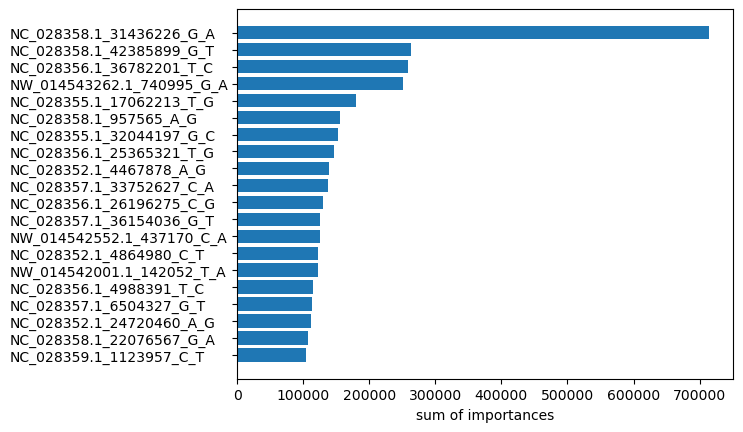

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = [v[1] for v in values]
y_pos = np.arange(len(people))
performance = [v[0] for v in values]

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=people, ha='left')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('sum of importances')
#ax.set_title('How fast do you want to go today?')
yax = ax.get_yaxis()
yax.set_tick_params(pad=160)
plt.savefig("importance_sum.jpg", bbox_inches = 'tight')
plt.show()

In [46]:
import skopt
from skopt import gp_minimize
#from sklearn.optimization import gp_minimize


gp_minimize

<function skopt.optimizer.gp.gp_minimize(func, dimensions, base_estimator=None, n_calls=100, n_random_starts=None, n_initial_points=10, initial_point_generator='random', acq_func='gp_hedge', acq_optimizer='auto', x0=None, y0=None, random_state=None, verbose=False, callback=None, n_points=10000, n_restarts_optimizer=5, xi=0.01, kappa=1.96, noise='gaussian', n_jobs=1, model_queue_size=None)>

In [38]:
np.array(R) 

array([-0.35025917, -0.24389184, -0.34075612, -0.3407715 , -0.35465938,
       -0.34183868, -0.34077464, -0.3406092 , -0.33974884, -0.34503761,
       -0.35112695, -0.30021369, -0.34213071, -0.34231712, -0.31681226,
       -0.34108497, -0.3455172 , -0.34113138, -0.34235587, -0.34040282,
       -0.352814  , -0.34136731, -0.35194195, -0.34078839, -0.34078776,
       -0.29632601, -0.34241293, -0.31576292, -0.34190675, -0.34078164,
       -0.29621073, -0.34259882, -0.34114021, -0.34092742, -0.34077279,
       -0.34290563, -0.3406596 , -0.34616747, -0.34101095, -0.3408954 ,
       -0.34965541, -0.34543728, -0.34077888, -0.30514058, -0.3433501 ,
       -0.34145196, -0.34570238, -0.34413676, -0.3407725 , -0.35359939,
       -0.18150402, -0.34076207, -0.32607349, -0.34053921, -0.34941497,
       -0.13480349, -0.32686151, -0.34181279, -0.3418012 , -0.34247502,
       -0.34063559, -0.34251954, -0.3374279 , -0.34037213, -0.31699144,
       -0.33865603, -0.34078179, -0.3407365 , -0.35904339, -0.35

In [30]:
mean_I = {}
std_I = {}

for key in markers_v4.columns:
    arr = [d[key] if key in d.keys() else 0 for d in I]
    mean_I[key] = np.mean(arr)
    std_I[key] = np.sqrt(np.mean((np.array(arr) - mean_I[key]) ** 2))

mean_I
std_I


{'NC_028351.1_1130369_G_T': 399.98223042516594,
 'NC_028351.1_2589691_G_A': 784.3092952126542,
 'NC_028351.1_4389407_C_T': 597.445840408194,
 'NC_028351.1_6653772_G_A': 512.7209784684997,
 'NC_028351.1_7158567_A_G': 388.69116925036593,
 'NC_028351.1_7158573_G_T': 788.5193765647568,
 'NC_028351.1_7923697_C_T': 190.54159334980375,
 'NC_028351.1_9481105_C_T': 0.0,
 'NC_028351.1_10101288_G_A': 1120.9786976735006,
 'NC_028351.1_10609109_T_C': 690.8435761923798,
 'NC_028351.1_10692107_C_G': 657.3475963682924,
 'NC_028351.1_16697057_G_A': 881.4955121005228,
 'NC_028351.1_22007106_G_C': 288.58719958457505,
 'NC_028351.1_25184857_G_A': 864.8967765066812,
 'NC_028351.1_27159258_A_G': 883.7837688848523,
 'NC_028351.1_28618382_T_C': 473.02882348945883,
 'NC_028351.1_34854418_G_A': 754.1658301081886,
 'NC_028352.1_400760_G_A': 1369.3301482558381,
 'NC_028352.1_830476_G_C': 414.7605406766277,
 'NC_028352.1_1084989_T_G': 453.5941618456493,
 'NC_028352.1_1085005_C_T': 0.0,
 'NC_028352.1_1355349_A_G': 

<StemContainer object of 3 artists>

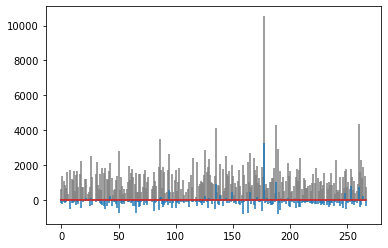

In [34]:
plt.stem([mean_I[c] + std_I[c] if c in mean_I else 0 for c in markers_v4.columns]
         , markerfmt=' ', linefmt='grey')

plt.stem([mean_I[c] - std_I[c] if c in mean_I else 0 for c in markers_v4.columns]
         , markerfmt=' ')
 
# корреляция
# shap
# участки
# 

<StemContainer object of 3 artists>

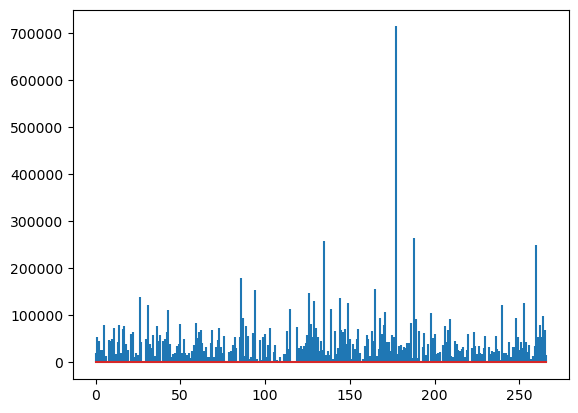

In [141]:
plt.stem([ scores[c] if c in scores else 0 for c in markers_v4.columns]
         , markerfmt=' ')

'NC_028355.1_34942800_A_T'

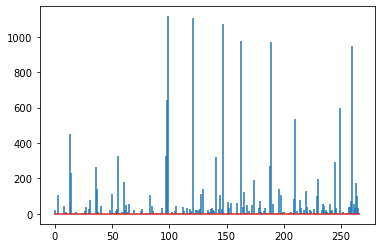

In [539]:
I5 = []
for i in I:
    I5.append(sorted([(i[k], k) for k in i], key=lambda x: x[0], reverse=True)[:10])
    
    
I5

d = {m:0 for m in markers_v4.columns}
I5
for a in I5:
    for v, k in a:
        d[k] += np.log(v)
    
plt.stem([d[c] for c in markers_v4.columns]
         , markerfmt=' ')
 
max(d, key=d.get)
# sum of first 6 
# NC_028358.1_31436226_G_A
# NC_028358.1_31415131_C_T
# NC_028358.1_31321418_G_C
# NC_028356.1_18228698_C_T
# NC_028354.1_20359715_C_T
# NC_028355.1_35044368_C_T

#
# NC_028358.1_31436226_G_A
# NC_028358.1_31415131_C_T
# NC_028358.1_31321418_G_C
# NC_028356.1_18228698_C_T
# NC_028354.1_20359715_C_T
# NC_028358.1_4599500_T_C
# NW_014542552.1_437170_C_A
# NC_028355.1_35044368_C_T
# NC_028355.1_34942800_A_T

[None]

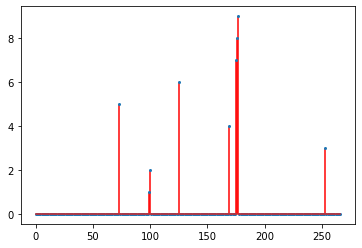

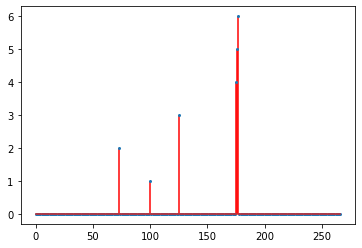

In [561]:
snps =  ['NC_028358.1_31436226_G_A'
               , 'NC_028358.1_31415131_C_T'
               , 'NC_028358.1_31321418_G_C'
               , 'NC_028356.1_18228698_C_T'
               , 'NC_028354.1_20359715_C_T'
               , 'NC_028358.1_4599500_T_C'
               , 'NW_014542552.1_437170_C_A'
               , 'NC_028355.1_35044368_C_T'
               , 'NC_028355.1_34942800_A_T']

height = [len(snps) - snps.index(c) if c in snps else 0 for c in markers_v4.columns]
markerline, stemline, baseline, = plt.stem( height, linefmt='red')
plt.setp(markerline, markersize = 2)




plt.figure()
snps = ['NC_028358.1_31436226_G_A'
                , 'NC_028358.1_31415131_C_T'
                , 'NC_028358.1_31321418_G_C'
                , 'NC_028356.1_18228698_C_T'
                , 'NC_028354.1_20359715_C_T'
                , 'NC_028355.1_35044368_C_T']
height = [len(snps) - snps.index(c) if c in snps else 0 for c in markers_v4.columns]
markerline, stemline, baseline, = plt.stem( height, linefmt='red')
plt.setp(markerline, markersize = 2)


In [182]:
grs = X.groupby(['NC_028358.1_31436226_G_A'
               , 'NC_028358.1_31415131_C_T'
               , 'NC_028358.1_31321418_G_C'
               , 'NC_028356.1_18228698_C_T'
               , 'NC_028354.1_20359715_C_T']).groups

In [413]:
N = []
P = []

for i in range(300):

    X_ch = X[['NC_028358.1_31436226_G_A'
               , 'NC_028358.1_31415131_C_T'
               , 'NC_028358.1_31321418_G_C'
               , 'NC_028356.1_18228698_C_T'
               , 'NC_028354.1_20359715_C_T']]

    X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(X_ch, y, test_size=0.15)
    params = booster_params.copy()


    new_params = {
        "eta" : min(1, lognormal(mean=-3, sigma=1.5)),
        "max_depth" : int(max(4, normal(12, 5))),
        "min_child_weight" : int(max(1, normal(7, 3))),
    }

    num_boost_round=int(max(20, normal(250, 50)))
    params.update(new_params)

    boo = xgboost.train(
        params,
        xgboost.DMatrix(X_train_ch, label=y_train_ch),
        num_boost_round=num_boost_round,
        )       

    if np.sqrt(mse(boo.predict(xgboost.DMatrix(X_test_ch)), y_test_ch)) < 49:
        P.append(params)
        N.append(num_boost_round)

In [505]:
X_ch = X[['NC_028358.1_31436226_G_A'
               , 'NC_028358.1_31415131_C_T'
               , 'NC_028358.1_31321418_G_C'
               , 'NC_028356.1_18228698_C_T'
               , 'NC_028354.1_20359715_C_T']]

X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(X_ch, y, test_size=0.15)

params = {'booster': 'gbtree',
  'verbosity': 1,
  'eta': 0.013961548369302627,
  'gamma': 0.001,
  'max_depth': 4,
  'min_child_weight': 6,
  'subsample': 1,
  'colsample_bytree': 1,
  'colsample_bylevel': 1,
  'colsample_bynode': 1,
  'grow_policy': 'lossguide'}

num_boost_round=300


boo = xgboost.train(
        params,
        xgboost.DMatrix(X_train_ch, label=y_train_ch),
        num_boost_round=num_boost_round,
        )       

np.sqrt(mse(boo.predict(xgboost.DMatrix(X_test_ch)), y_test_ch))


59.205148572885584

In [406]:
params = {'booster': 'gbtree',
  'verbosity': 1,
  'eta': 0.025309336014290425,
  'gamma': 0.001,
  'max_depth': 4,
  'min_child_weight': 5,
  'subsample': 1,
  'colsample_bytree': 1,
  'colsample_bylevel': 1,
  'colsample_bynode': 1,
  'grow_policy': 'lossguide'}

params = {'booster': 'gbtree',
  'verbosity': 1,
  'eta': 0.013961548369302627,
  'gamma': 0.001,
  'max_depth': 4,
  'min_child_weight': 6,
  'subsample': 1,
  'colsample_bytree': 1,
  'colsample_bylevel': 1,
  'colsample_bynode': 1,
  'grow_policy': 'lossguide'}

In [415]:
P

[{'booster': 'gbtree',
  'verbosity': 1,
  'eta': 0.07564812422082462,
  'gamma': 0.001,
  'max_depth': 10,
  'min_child_weight': 7,
  'subsample': 1,
  'colsample_bytree': 1,
  'colsample_bylevel': 1,
  'colsample_bynode': 1,
  'grow_policy': 'lossguide'},
 {'booster': 'gbtree',
  'verbosity': 1,
  'eta': 0.1493820738830958,
  'gamma': 0.001,
  'max_depth': 4,
  'min_child_weight': 5,
  'subsample': 1,
  'colsample_bytree': 1,
  'colsample_bylevel': 1,
  'colsample_bynode': 1,
  'grow_policy': 'lossguide'},
 {'booster': 'gbtree',
  'verbosity': 1,
  'eta': 0.00587815709668414,
  'gamma': 0.001,
  'max_depth': 12,
  'min_child_weight': 9,
  'subsample': 1,
  'colsample_bytree': 1,
  'colsample_bylevel': 1,
  'colsample_bynode': 1,
  'grow_policy': 'lossguide'},
 {'booster': 'gbtree',
  'verbosity': 1,
  'eta': 0.4581481860682409,
  'gamma': 0.001,
  'max_depth': 13,
  'min_child_weight': 7,
  'subsample': 1,
  'colsample_bytree': 1,
  'colsample_bylevel': 1,
  'colsample_bynode': 1,
  

In [194]:
#for gr in grs:
#    print(np.mean(y[grs[gr]]))
#for gr in grs:
#    y[gr]

In [155]:
#X.loc[group_0]['NC_028358.1_31436226_G_A']
print(np.mean(y[group_0]))
print(np.mean(y[group_1]))
print(np.mean(y[group_2]))

X.drop()

66.17539267015707
72.62542955326461
77.10031847133757
54.02677986770199


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [89]:
params = booster_params.copy()


new_params = {
        "eta" : 0.05,
        "max_depth" : 13,
        "min_child_weight" : 3,
    }

num_boost_round=120
params.update(new_params)

boo = xgboost.train(
        params,
        xgboost.DMatrix(X, label=y),
        num_boost_round=num_boost_round,
        )

np.sqrt(mse(boo.predict(xgboost.DMatrix(X)), y))

51.63147720198839

In [45]:
np.sqrt(3763)

61.34329629226001

In [83]:
np.array(P)[np.sqrt(np.array(E)) < 51.7]
np.array(N)[np.sqrt(np.array(E)) < 51.7]


array([ 91,  98, 107, 204, 172,  94, 125,  54, 113,  99, 171,  84, 141,
        95, 162, 164,  55, 186, 149, 164, 156, 145, 139, 104, 105, 107,
       140,  65, 234, 173,  71,  85,  45,  61, 201, 171, 153, 169, 157,
        47, 123, 147, 113, 160, 103, 167,  96, 113,  71, 114, 140,  78,
       102, 122,  28,  55,  72, 122,  65,  97, 126, 159, 114, 120,  20,
        32, 136,  86, 234,  72,  83,  71, 120, 138,  95, 149, 201, 146,
        46,  64, 160,  41,  63, 141, 133,  79, 165,  89, 154, 130, 138,
       141, 166,  69, 214,  79, 121, 123, 121, 116, 171,  43,  92, 138,
       137, 156, 159, 125, 162, 120, 175,  94,  21, 175,  34, 126,  96,
        38,  53,  37,  91, 110, 179, 255,  87, 144, 202,  84,  39, 104,
        61,  60, 155,  28, 117, 189, 189,  93])

In [84]:
np.array(P)[np.sqrt(np.array(E)) < 51.7]

array([{'eta': 0.04497916559428636, 'max_depth': 9, 'min_child_weight': 1},
       {'eta': 0.0596901130905326, 'max_depth': 17, 'min_child_weight': 6},
       {'eta': 0.6685560068990405, 'max_depth': 15, 'min_child_weight': 6},
       {'eta': 0.01781397656068477, 'max_depth': 21, 'min_child_weight': 6},
       {'eta': 0.16730053088232705, 'max_depth': 11, 'min_child_weight': 4},
       {'eta': 0.17283107025881536, 'max_depth': 10, 'min_child_weight': 6},
       {'eta': 0.12032445008492455, 'max_depth': 5, 'min_child_weight': 7},
       {'eta': 0.36021021412904247, 'max_depth': 14, 'min_child_weight': 1},
       {'eta': 0.3200293162934968, 'max_depth': 6, 'min_child_weight': 2},
       {'eta': 0.6867265178389648, 'max_depth': 7, 'min_child_weight': 1},
       {'eta': 0.1562565562840594, 'max_depth': 7, 'min_child_weight': 4},
       {'eta': 0.055995913156567226, 'max_depth': 22, 'min_child_weight': 3},
       {'eta': 0.05388618110088055, 'max_depth': 16, 'min_child_weight': 5},
       {

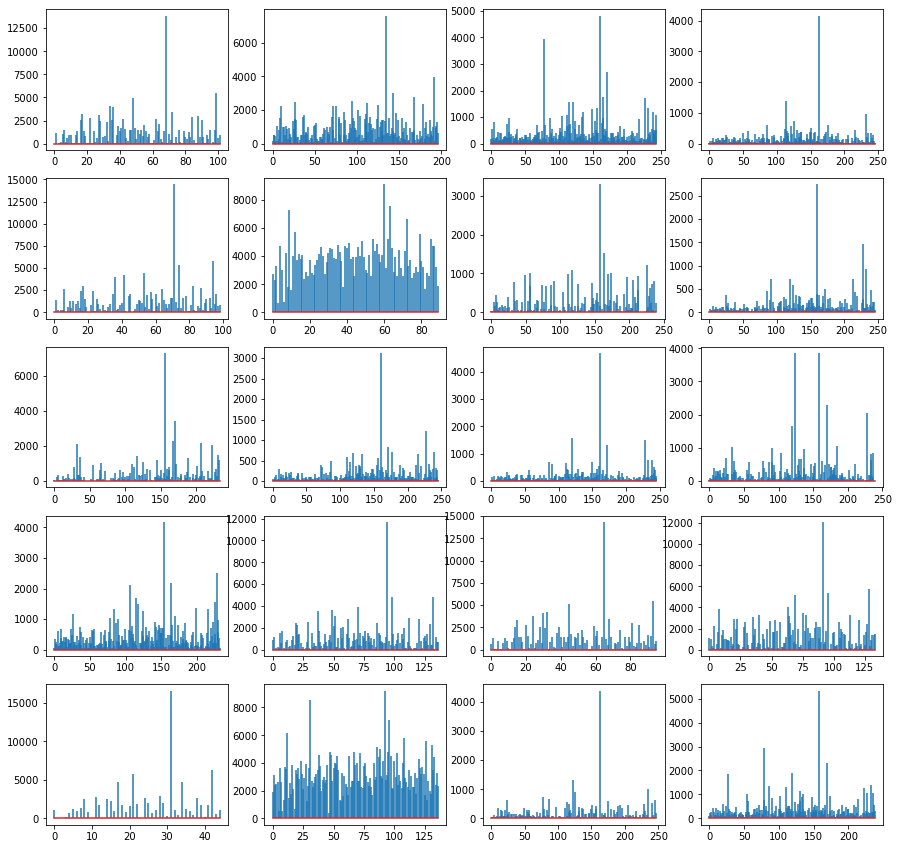

In [143]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize = (15, 15))
for i in range(4):
    for j in range(5):
        indx = j * 4 + i
        ax[j][i].stem(I[indx].values(), markerfmt=' ')

In [142]:
I[0]

{'NC_028351.1_2589691_G_A': 7.7414774894714355,
 'NC_028351.1_4389407_C_T': 1160.844970703125,
 'NC_028351.1_6653772_G_A': 4.714962005615234,
 'NC_028351.1_7158567_A_G': 16.03125,
 'NC_028351.1_7923697_C_T': 145.3011016845703,
 'NC_028351.1_10609109_T_C': 1016.9431762695312,
 'NC_028351.1_10692107_C_G': 1500.8448486328125,
 'NC_028351.1_22007106_G_C': 121.17447662353516,
 'NC_028351.1_27159258_A_G': 585.0940551757812,
 'NC_028351.1_34854418_G_A': 973.0233154296875,
 'NC_028352.1_400760_G_A': 904.234375,
 'NC_028352.1_830476_G_C': 115.09528350830078,
 'NC_028352.1_1084989_T_G': 33.82878875732422,
 'NC_028352.1_1355349_A_G': 923.284912109375,
 'NC_028352.1_1756685_A_T': 1316.6383056640625,
 'NC_028352.1_2239136_G_C': 16.8359375,
 'NC_028352.1_4467878_A_G': 2546.814453125,
 'NC_028352.1_4864980_C_T': 3231.4609375,
 'NC_028352.1_10450882_A_T': 1335.282470703125,
 'NC_028352.1_10968089_C_G': 770.3201904296875,
 'NC_028352.1_18134950_C_T': 13.43718147277832,
 'NC_028352.1_18243086_C_A': 63.5